# 2D Materials Database Summary

## Read database

In [16]:
import json

materials=[]
with open('db.json', 'r') as file:
    for line in file:
        materials.append(json.loads(line))

print("Found %s materials" % len(materials))

import pandas as pd
    
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

materials_df = pd.DataFrame.from_dict(materials)
materials_df.set_index('material_id', inplace=True)

# drop unnecessary columns
for col in ['_id','_tasksbuilder','created_at']:
    if col in materials_df.columns:
        materials_df.drop(col, axis=1, inplace=True)

# expand dictionaries in cells
for dict_column in ['bandstructure', 'calc_settings', 'spacegroup', 'thermo']:
    if dict_column in materials_df.columns:
        materials_df=materials_df.join(materials_df[dict_column].apply(pd.Series),lsuffix='_orig')
        materials_df.drop([dict_column], axis=1, inplace=True)

Found 5255 materials


/home/mcosta/Desktop/jupyterlab/venv/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/home/mcosta/Desktop/jupyterlab/venv/lib/python3.6/site-packages/pandas/core/indexes/api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
/home/mcosta/Desktop/jupyterlab/venv/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


In [17]:
import matplotlib
%matplotlib inline

## Histogram of bandgaps

Text(0.5,0,'bandgap (eV)')

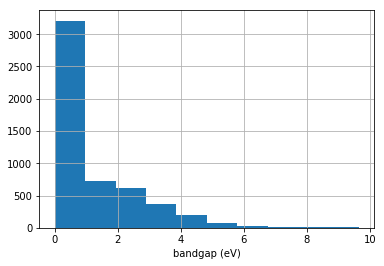

In [18]:
ax=materials_df['bandgap'].hist()
ax.set_xlabel('bandgap (eV)')

## Histogram of number of elements

Text(0.5,0,'number of atomic species')

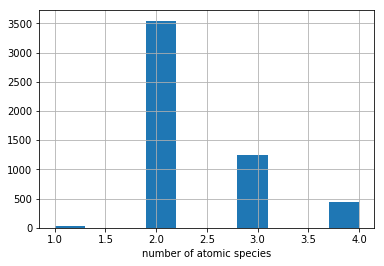

In [19]:
ax=materials_df['nelements'].hist()
ax.set_xlabel('number of atomic species')

## Most common anonynous formula of binary compounts

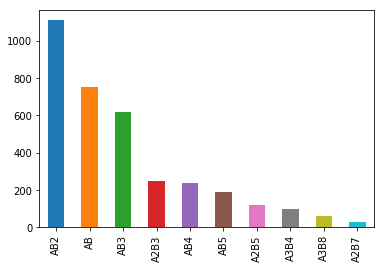

In [23]:
x=materials_df['formula_anonymous'].where(materials_df['nelements'] == 2).value_counts()[:10].plot(kind='bar')

## Most common crystal systems

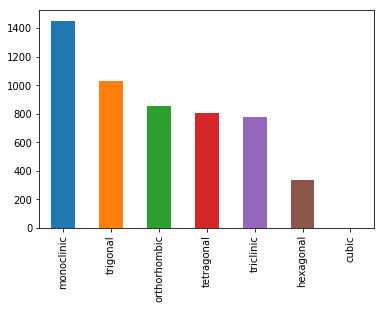

In [24]:
ax=materials_df['crystal_system'].value_counts()[:10].plot(kind='bar')

## Most common spacegroups

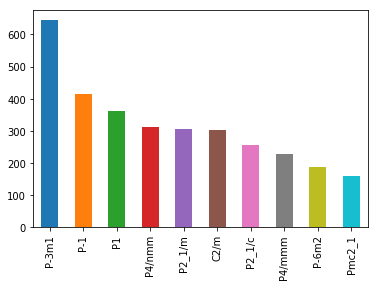

In [25]:
ax=materials_df['sg_symbol'].value_counts()[:10].plot(kind='bar')

## ...